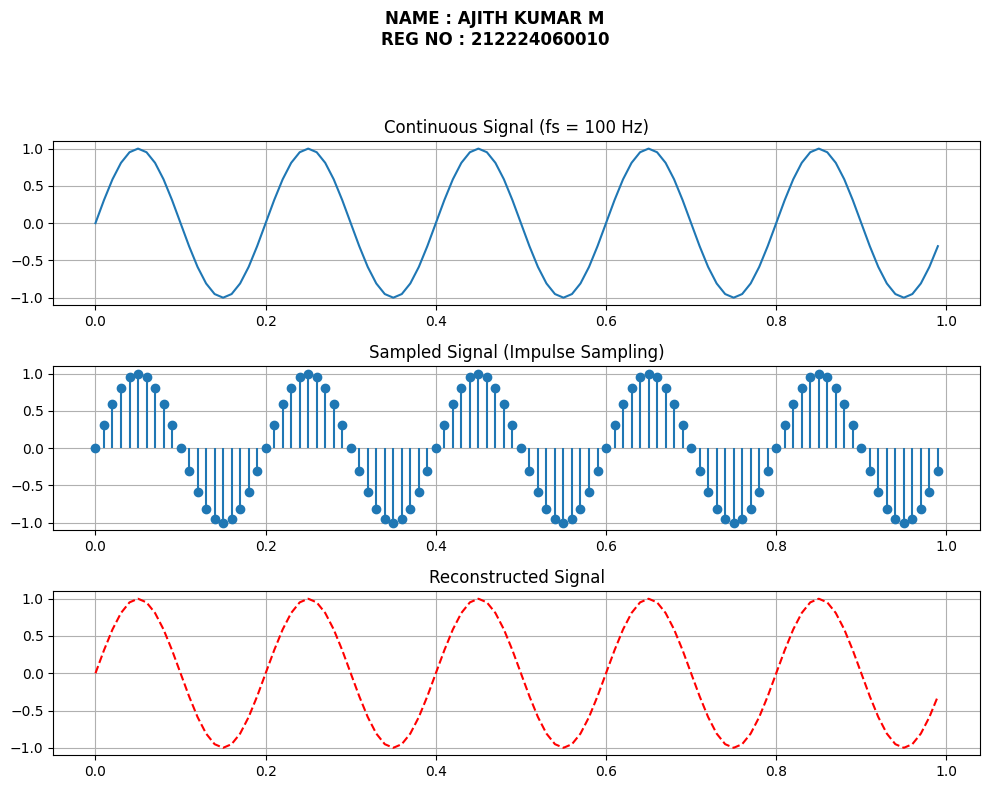

In [1]:
#NAME : AJITH KUMAR M
#REG NO : 212224060010
#EXP NO : 1
#EXP NAME : IDEAL SAMPLING

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Parameters
fs, f = 100, 5
t = np.arange(0, 1, 1/fs)

# Continuous signal
x = np.sin(2*np.pi*f*t)

# Impulse sampling
xs = x

# Reconstruction
xr = resample(xs, len(t))

# Plot
plt.figure(figsize=(10,8))
plt.suptitle("NAME : AJITH KUMAR M\nREG NO : 212224060010",
             fontsize=12, fontweight='bold')

plt.subplot(3,1,1)
plt.plot(t, x)
plt.title("Continuous Signal (fs = 100 Hz)")
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(t, xs, basefmt=" ")
plt.title("Sampled Signal (Impulse Sampling)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, xr, 'r--')
plt.title("Reconstructed Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()


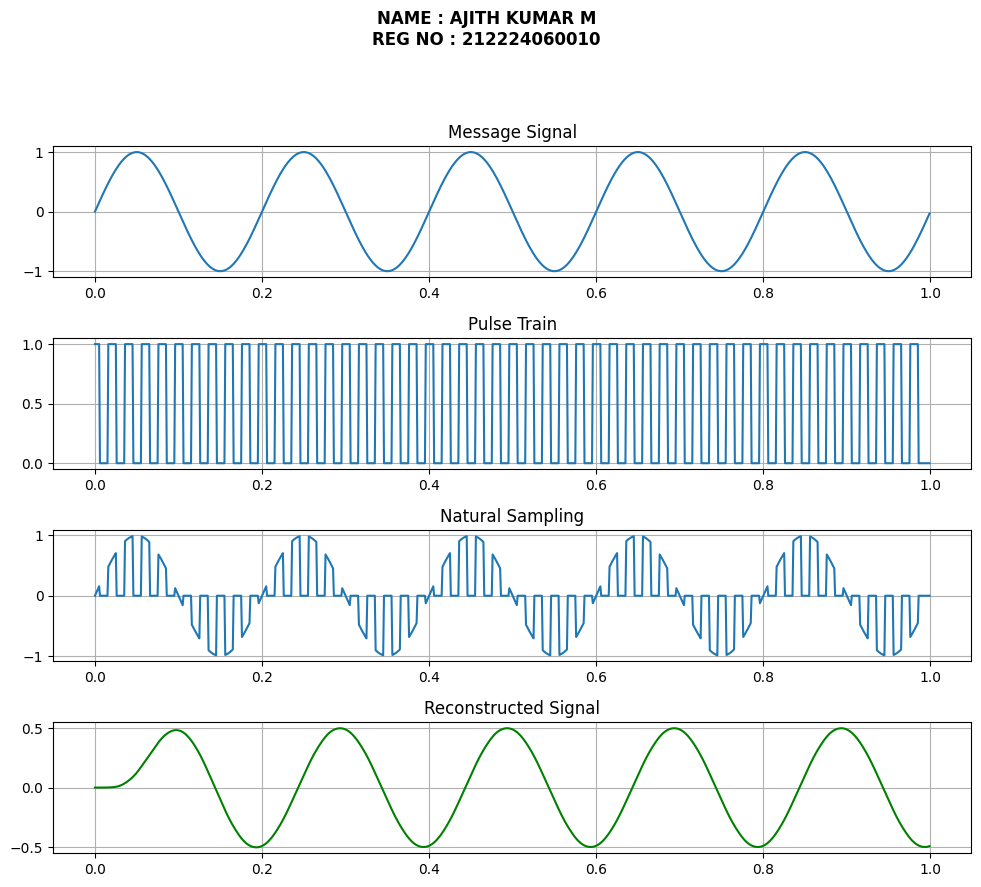

In [2]:
#NAME : AJITH KUMAR M
#REG NO : 212224060010
#EXP NO : 1
#EXP NAME : NATURAL SAMPLING

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parameters
fs, T, fm, fp = 1000, 1, 5, 50
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Pulse train
pw = fs // (2*fp)
p = np.zeros_like(t)
p[::fs//fp] = 1
p = np.convolve(p, np.ones(pw), mode='same')

# Natural sampling
nat = m * p

# Reconstruction (LPF)
b, a = butter(4, 10/(0.5*fs), 'low')
rec = lfilter(b, a, nat)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : AJITH KUMAR M\nREG NO : 212224060010",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, m)
plt.title("Message Signal")
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t, p)
plt.title("Pulse Train")
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(t, nat)
plt.title("Natural Sampling")
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(t, rec, color='g')
plt.title("Reconstructed Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()


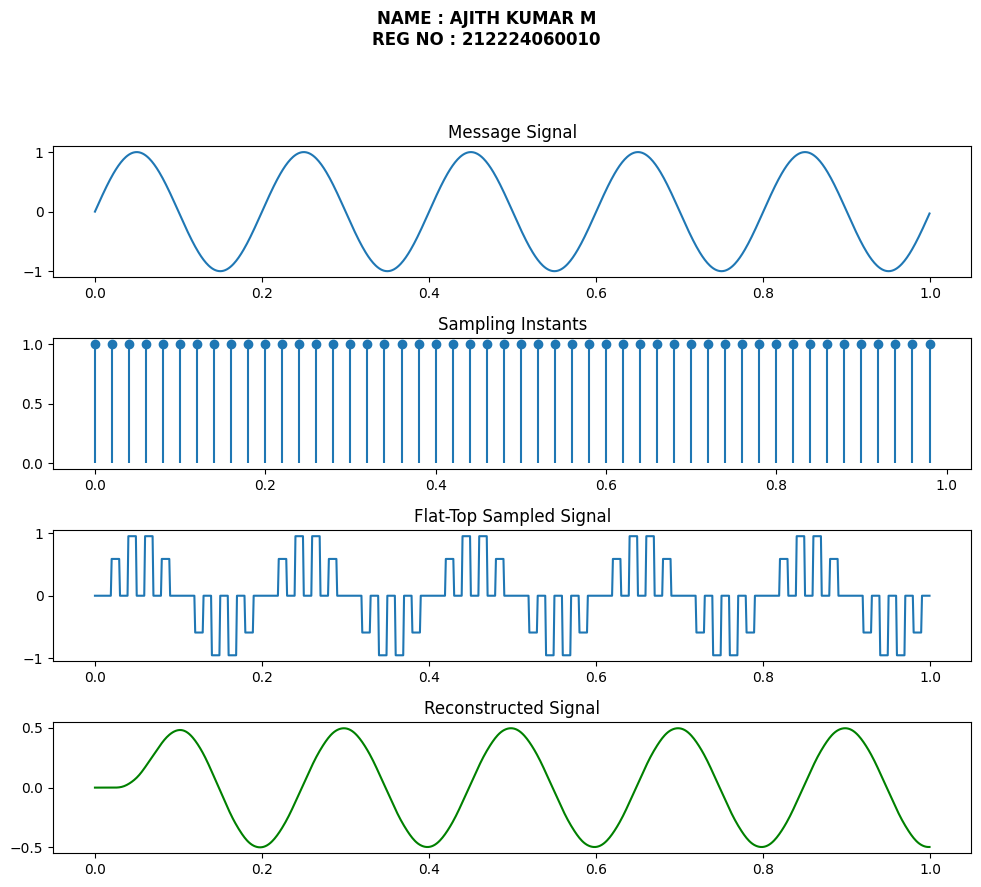

In [3]:
#NAME : AJITH KUMAR M
#REG NO : 212224060010
#EXP NO : 1
#EXP NAME : FLAT TOP SAMPLING

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parameters
fs, T, fm, fp = 1000, 1, 5, 50
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Sampling
bd = fs // fp
idx = np.arange(0, len(t), bd)
flat = np.zeros_like(t)

for i in idx:
    flat[i:i+bd//2] = m[i]

# Low-pass filter (reconstruction)
b, a = butter(4, (2*fm)/(0.5*fs), 'low')
recon = lfilter(b, a, flat)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : AJITH KUMAR M\nREG NO : 212224060010",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, m)
plt.title("Message Signal")

plt.subplot(4,1,2)
plt.stem(t[idx], np.ones_like(idx), basefmt=" ")
plt.title("Sampling Instants")

plt.subplot(4,1,3)
plt.plot(t, flat)
plt.title("Flat-Top Sampled Signal")

plt.subplot(4,1,4)
plt.plot(t, recon, color='g')
plt.title("Reconstructed Signal")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()